# CS3990/5990: Secure Distributed Computation
## In-Class Exercise, Week of 8/28/2023

# Question 1

Write functions `enc` and `dec` for an additively homomorphic cryptosystem over the integers.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def enc(x):
    # idea: add a random number to x so that the output looks random
    k = np.random.randint(0, 17)
    return x+k, k

def dec(pair):
    c, k = pair
    return c - k

In [19]:
enc(5)

(11, 6)

(array([ 95., 117.,  52., 118.,  72., 120., 127.,  56., 131., 112.]),
 array([10. , 11.6, 13.2, 14.8, 16.4, 18. , 19.6, 21.2, 22.8, 24.4, 26. ]),
 <BarContainer object of 10 artists>)

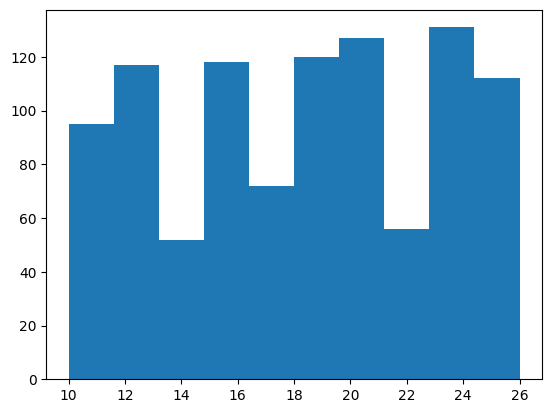

In [21]:
r = [enc(10)[0] for _ in range(1000)]
plt.hist(r)

In [4]:
assert dec(enc(5)) == 5
assert dec(enc(0)) == 0
assert dec(enc(1)) == 1

c, k = enc(5)
assert dec((c + 10, k)) == 15

c2, k2 = enc(20)
assert dec((c + c2, k + k2)) == 25

# Question 2

Why is the above solution considered a *one-time pad*?

One-time pad: add a random number or string to the plaintext message to get a random-looking ciphertext.

- We encrypt the number by adding another (random) number to it: the key is a random value that is the same length as the plaintext message
- We can only use each key once

# Question 3

What is problematic (for security) about the use of integers in the above solution?

The problem is that you can't pick a random integer, because the integers are unbounded

If we pick random integers from a bounded interval, then ciphertexts can reveal something to the adversary about the plaintext.

## Question 4

Write functions `plusFE` and `multFE` that add and multiply two field elements in $GF(p)$, respectively.

In [6]:
def plusFE(p, a, b):
    return (a + b) % p
    
def multFE(p, a, b):
    return (a * b) % p

In [7]:
multFE(p, 3, 4)

12

In [16]:
assert plusFE(100, 2, 3) == 5
assert plusFE(3, 2, 3) == 2
assert plusFE(2, 1, 1) == 0
assert multFE(100, 2, 5) == 10
assert multFE(3, 2, 5) == 1
assert multFE(2, 1, 1) == 1
assert multFE(2, 1, 0) == 0

## Question 5

Write functions `enc` and `dec` for an additively homomorphic cryptosystem in the finite field $GF(p)$.

In [22]:
def enc(p, x):
    # idea: add a random number to x so that the output looks random
    # now: make all arithmetic mod p
    k = np.random.randint(0, p)
    return (x+k) % p, k

def dec(p, pair):
    c, k = pair
    return (c - k) % p

In [29]:
c1, k1 = enc(p, 5)
c2, k2 = enc(p, 6)
c_sum = plusFE(p, c1, c2)
k_sum = plusFE(p, k1, k2)
dec(p, (c_sum, k_sum))

11

In [10]:
assert dec(100, enc(100, 5)) == 5
assert dec(2, enc(2, 0)) == 0
assert dec(2, enc(2, 1)) == 1

c, k = enc(100, 5)
assert dec(100, (c + 10, k)) == 15

(array([66., 58., 69., 49., 72., 54., 55., 65., 70., 66., 50., 58., 58.,
        42., 62., 56., 50.]),
 array([ 0.        ,  0.94117647,  1.88235294,  2.82352941,  3.76470588,
         4.70588235,  5.64705882,  6.58823529,  7.52941176,  8.47058824,
         9.41176471, 10.35294118, 11.29411765, 12.23529412, 13.17647059,
        14.11764706, 15.05882353, 16.        ]),
 <BarContainer object of 17 artists>)

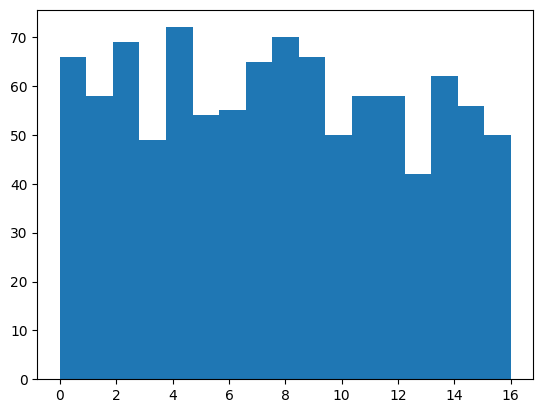

In [15]:
r = [enc(17, 10)[0] for _ in range(1000)]
plt.hist(r, bins=17)

## Question 6

Write a function `share` that generates $n$ additive secret shares from a single field element $x \in GF(p)$.

In [42]:
def sumFE(p, xs):
    total = 0
    for x in xs:
        total = plusFE(p, x, total)
    return total

def share(p, n, x):
    # want to construct n secret shares from x
    # such that I can reconstruct x if I have all n shares
    # but I learn nothing if I have fewer than n shares

    # want to ensure that if we add up all the shares, we get x
    # generate n-1 random shares
    # the nth share is x - sum(other shares)
    # (x-sum(other shares)) + sum(other shares)
    shares = [np.random.randint(0, p) for _ in range(n-1)]
    last_share = plusFE(p, x, - sumFE(p, shares))
    shares.append(last_share)
    return shares
sumFE(p, share(p, 5, 10))
d1 = 10
d2 = 25
sA1, sB1 = share(p, 2, d1)
sA2, sB2 = share(p, 2, d2)
c1 = plusFE(p, a1, b1)
c2 = plusFE(p, a2, b2)
plusFE(p, c1, c2)
sumFE(p, [a1, a2, b1, b2])

35

In [34]:
assert sumFE(100, share(100, 2, 5)) == 5
assert sumFE(2, share(2, 5, 1)) == 1
assert sumFE(2, share(2, 5, 0)) == 0
assert sumFE(2, share(2, 50, 1)) == 1

In [ ]:
# Example
print(share(100, 2, 5))
print(share(2, 5, 1))